In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [75]:
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder,  
    HamDrift4D,
    HamDipole6D,
    HamDipole6DParaxialSecondOrder,
    HamDipole4D,
    HamQuad6D,
    HamQuad4D,
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
    HamSQuad6D,
    HamSQuad6DParaxialSecondOrder,
    HamSext6D,
    HamSext4D,
    HamRFTM0106D,
    HamRFTM0106DAvg,
    HamRFTM0106DAvgParaxialSecondOrder,
    HamSolenoid6D,
    HamSolenoid6DparaxialSecondOrder,
    HamCombBend6DParaxialSecondOrder
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D

In [56]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f, k1s = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f k_{1s}', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

# accHamiltoniansAndMatrices: an introduction

**M. Arlandoo, J. Frank, T. Mertens**

# Original motivation

- accelerator Hamiltonians in a single place
- accelerator Matrices in a single place
- symbolically for theoretical calculations
- numerically for simulations
- this presentation: focusses on this - extensions can be found in other Example notebooks

# Hamiltonians

## Drifts

**Available Hamiltonians:**
- HamDrift6D
- HamDrift6DParaxialSecondOrder
- HamDrift4D

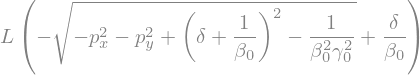

In [36]:
H0 = HamDrift6D(beta0, gamma0, L, x, px, y, py, delta)
H0

The derivation of the approximation below is demonstrated in the notebook "Wolski_Hamiltonian_Expansion".

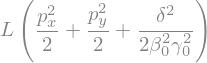

In [37]:
HamDrift6DParaxialSecondOrder(beta0, gamma0, L, x, px, y, py, delta)

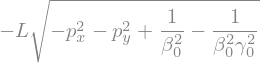

In [38]:
HamDrift4D(beta0, gamma0, L, x, px, y, py)

## Dipoles

**Available Hamiltonians:**
- HamDipole6D
- HamDipole6DParaxialSecondOrder
- HamDipole4D

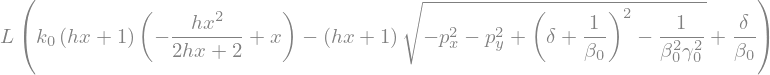

In [39]:
HamDipole6D(beta0,gamma0,L,x,px,y,py,delta,h,k0)

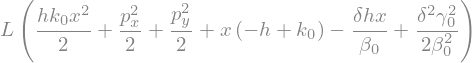

In [40]:
HamDipole6DParaxialSecondOrder(beta0,gamma0,L,x,px,y,py,delta,h,k0)

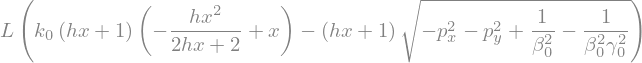

In [41]:
HamDipole4D(beta0,gamma0,L,x,px,y,py,h,k0)

## Quadrupoles

**Available Hamiltonians:**
- HamQuad6D
- HamQuad6DParaxialSecondOrder
- HamQuad6DParaxialSecondOrderChroma
- HamSQuad6D
- HamSQuad6DParaxialSecondOrder
- HamQuad4D

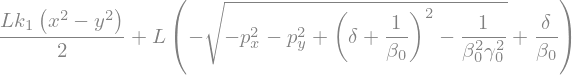

In [42]:
HamQuad6D(beta0, gamma0, L, x, px, y, py, delta, k1)

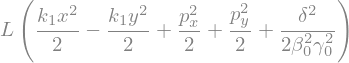

In [43]:
HamQuad6DParaxialSecondOrder(beta0, gamma0, L, x, px, y, py, delta, k1)

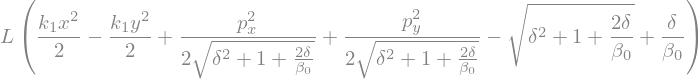

In [44]:
HamQuad6DParaxialSecondOrderChroma(beta0, gamma0, L, x, px, y, py, delta, k1)

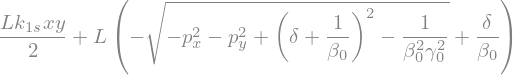

In [57]:
HamSQuad6D(beta0, gamma0, L, x, px, y, py, delta, k1s)

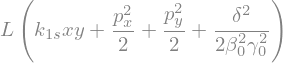

In [58]:
HamSQuad6DParaxialSecondOrder(beta0, gamma0, L, x, px, y, py, delta, k1s)

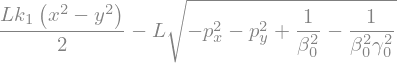

In [45]:
HamQuad4D(beta0, gamma0, L, x, px, y, py, k1)

## Sextupoles

**Available Hamiltonians:**
- HamSext6D
- HamSext4D

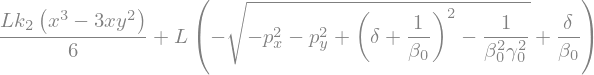

In [48]:
HamSext6D(beta0, gamma0, L, x, px, y, py, delta, k2)

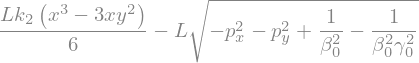

In [49]:
HamSext4D(beta0, gamma0, L, x, px, y, py, k2)

## RF

**Available Hamiltonians:**
- HamRFTM0106D
- HamRFTM0106DAvg
- HamRFTM0106DAvgParaxialSecondOrder

In [63]:
phi0, k,  s, rho, Es, q, P0, omega = symbols("phi_0 k s rho E_s q, P_0 omega")

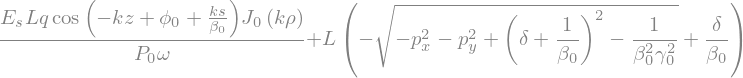

In [64]:
 HamRFTM0106D(beta0, gamma0, L, x, px, y, py, z, delta, phi0, s, k, rho, Es, q, P0, omega)

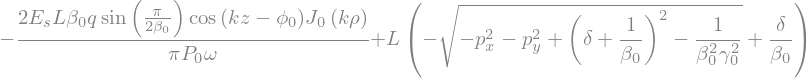

In [66]:
HamRFTM0106DAvg(beta0, gamma0, L, x, px, y, py, z, delta, phi0, k, rho, Es, q, P0, omega)

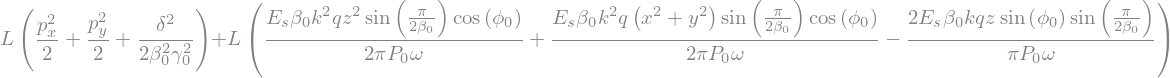

In [67]:
HamRFTM0106DAvgParaxialSecondOrder(beta0, gamma0, L, x, px, y, py, z, delta, phi0, k, rho, Es, q, P0, omega)

## Solenoid

**Available Hamiltonians:**
- HamSolenoid6D
- HamSolenoid6DparaxialSecondOrder

In [71]:
ks = symbols("k_s")

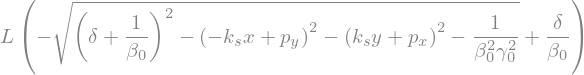

In [72]:
HamSolenoid6D(beta0, gamma0, L, x, px, y, py, delta, ks)

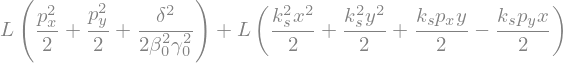

In [73]:
HamSolenoid6DparaxialSecondOrder(beta0, gamma0, L, x, px, y, py, delta, ks)

## Combined Function Bend

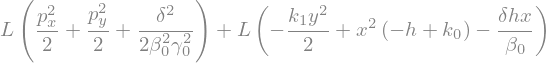

In [76]:
HamCombBend6DParaxialSecondOrder(beta0, gamma0, L, x, px, y, py, delta, k0, k1, h)

# Matrices

In [107]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbDrift6D,
    RsymbDrift4D,
    RsymbDipole6D,
    RsymbDipole4D,
    RsymbDipoleFringe,
    RsymbDipoleComb,
    RMsymbDipoleComb, # extra constant 6D vector - map is of the form Rx+M
    RsymbQuad6D, 
    RsymbQuad4D,
    RsymbQuad6DChroma, 
    RsymbSQuad6D,
    RsymbQuad6DThin,
    RsymbRFTM0106D,
    RMsymbRFTM0106D, # extra constant 6D vector - map is of the form Rx+M
    RsymbSolenoid,
    RsymbFODO
)

## Drifts

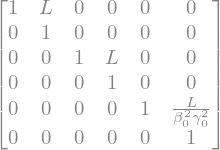

In [81]:
 RsymbDrift6D(beta0, gamma0, L)

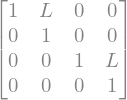

In [83]:
RsymbDrift4D(beta0, gamma0, L)

## Dipoles

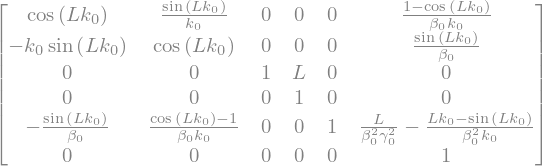

In [101]:
 RsymbDipole6D(beta0, gamma0, L, k0)

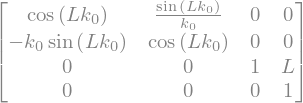

In [102]:
RsymbDipole4D(beta0, gamma0, L, k0)

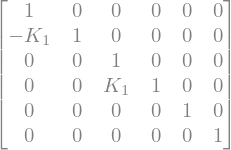

In [103]:
K1 = symbols("K_1")
RsymbDipoleFringe(K1)

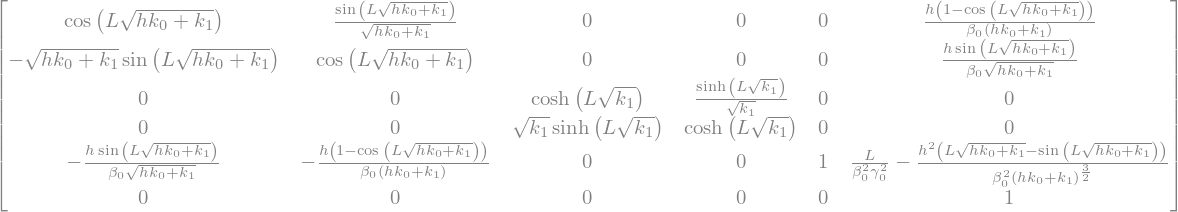

In [105]:
RsymbDipoleComb(beta0, gamma0, L, h, k0, k1) # in general h = k0

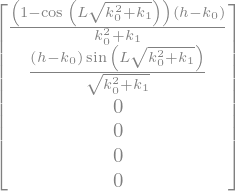

In [109]:
RMsymbDipoleComb(beta0, gamma0, L, h, k0, k1) # in general h = k0

## Quadrupoles

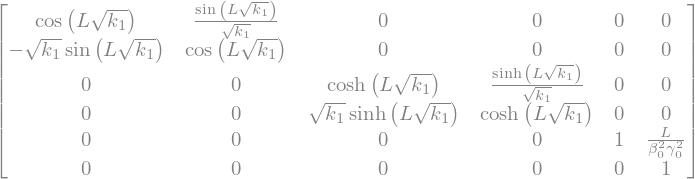

In [86]:
RsymbQuad6D(beta0, gamma0, L, k1)

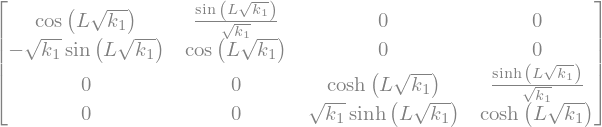

In [87]:
 RsymbQuad4D(beta0, gamma0, L, k1)

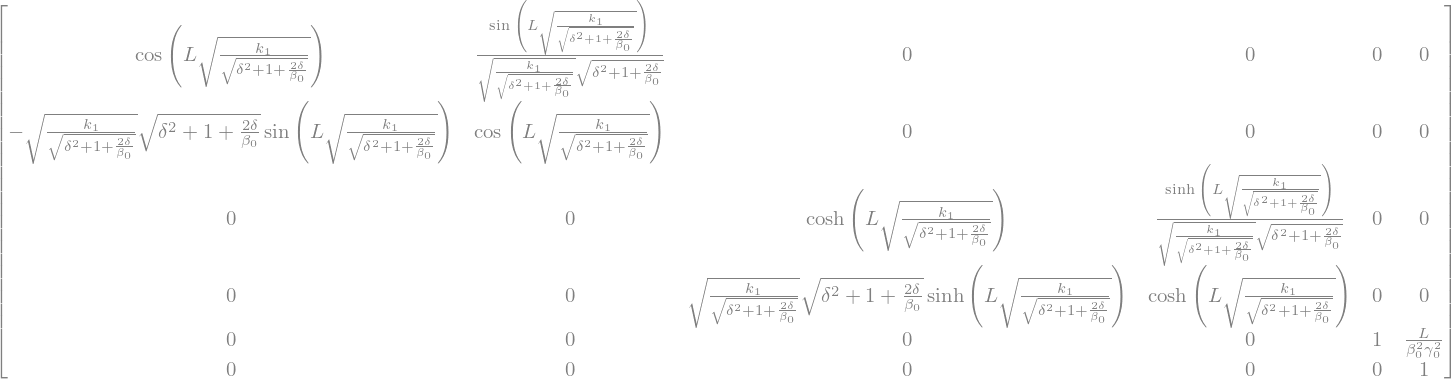

In [89]:
RsymbQuad6DChroma(beta0, gamma0, L, k1, delta)

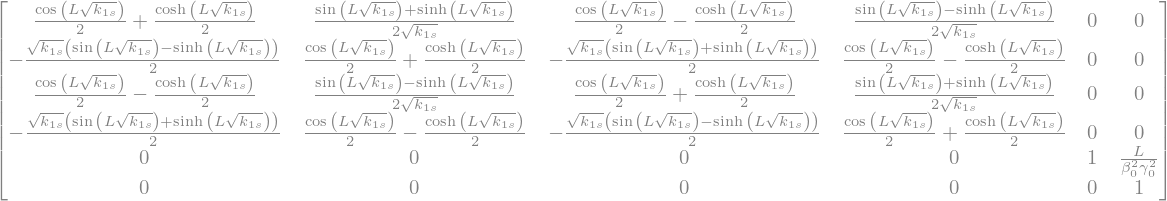

In [90]:
RsymbSQuad6D(beta0, gamma0, L, k1s)

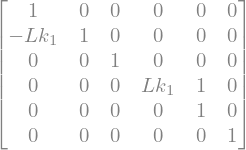

In [99]:
RsymbQuad6DThin(L, k1)

## RF

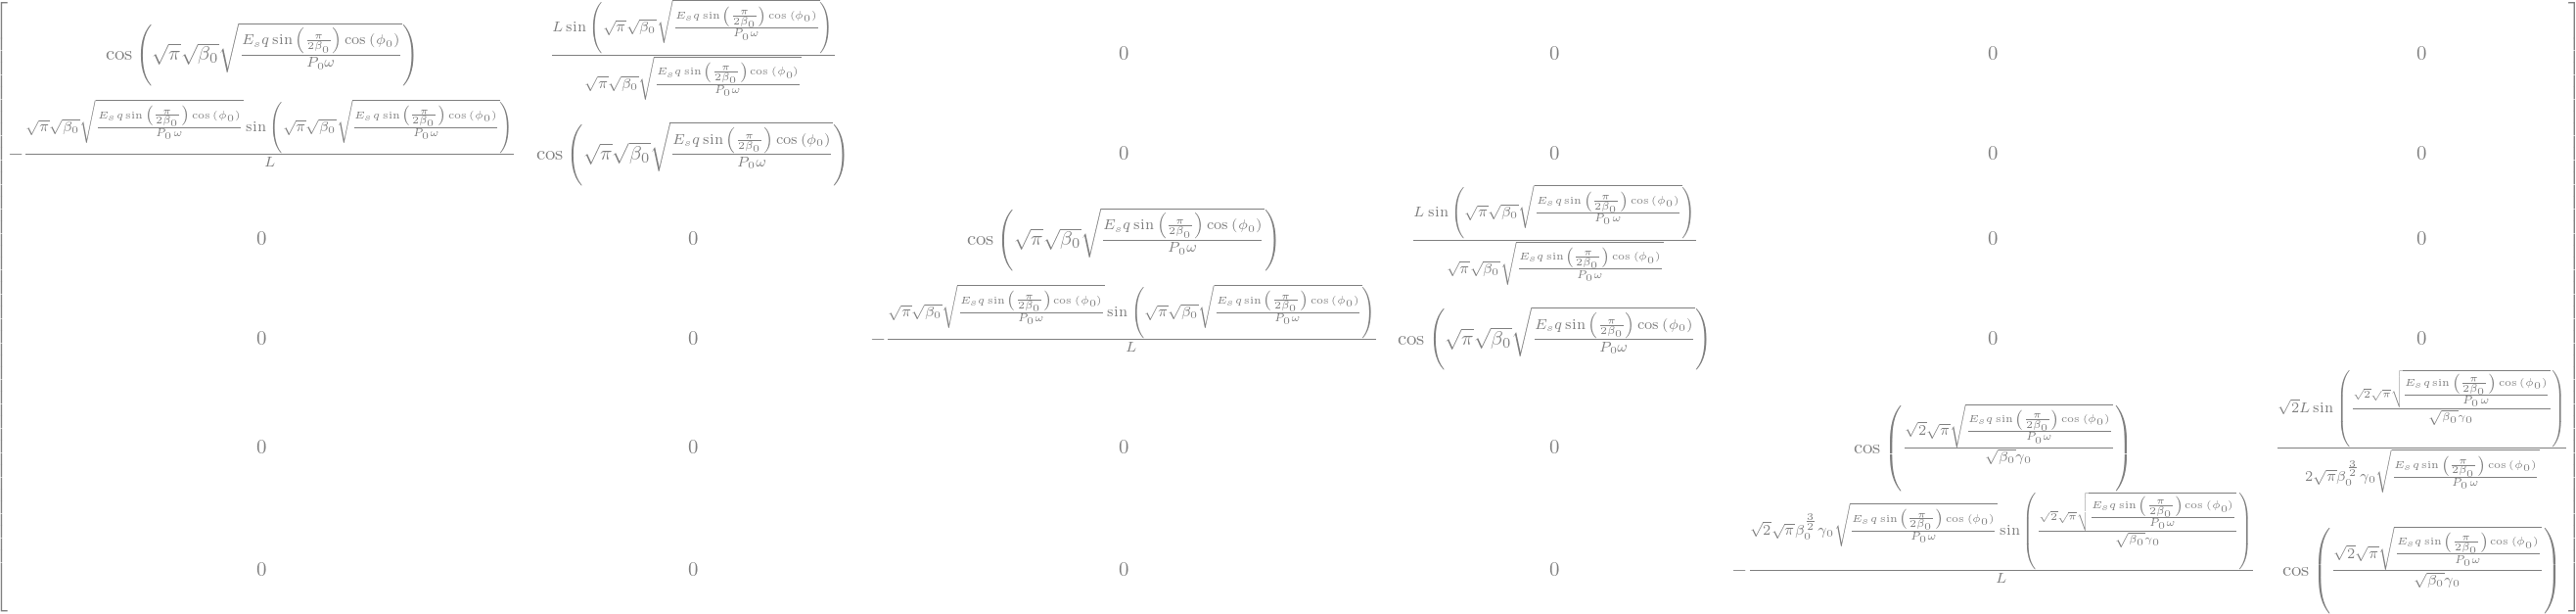

In [91]:
RsymbRFTM0106D(beta0, gamma0, L, phi0, q, P0, Es, omega)

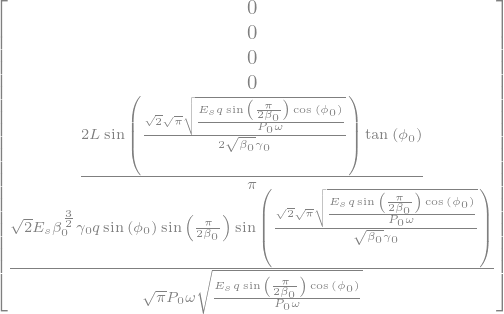

In [93]:
RMsymbRFTM0106D(beta0, gamma0, L, phi0, q, P0, Es, omega)

## Solenoid

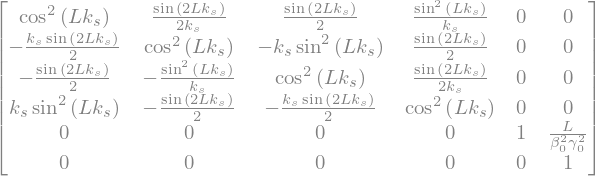

In [94]:
RsymbSolenoid(beta0, gamma0, L, ks)

## FODO

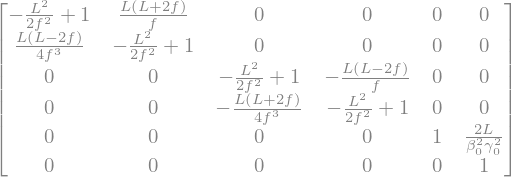

In [100]:
RsymbFODO(beta0, gamma0, L, f)

# Numpy Matrix Functions

In [111]:
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpDrift6D,
    RnpDrift4D,
    RnpDipole6D,
    RnpDipole4D,
    RnpDipoleComb,
    RMnpDipoleComb,
    RnpDipoleFringe,
    RnpQuad6D,
    RnpQuad4D,
    RnpQuad6DChroma,
    RnpSQuad6D,
    RnpQuad6DThin,
    RnpRFTM0106D,
    RMnpRFTM0106D,
    RnpSolenoid,
    RnpFODO
)

In [113]:
print(RnpDrift6D(1,3600,5))

[[1.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 5.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 3.85802469e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [114]:
print(RnpDrift4D(1,3600,5))

[[1 5 0 0]
 [0 1 0 0]
 [0 0 1 5]
 [0 0 0 1]]


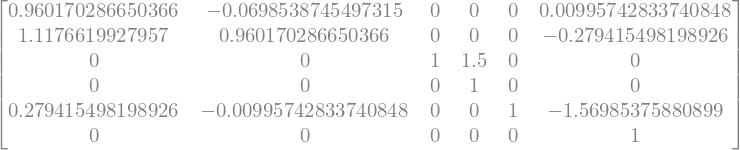

In [116]:
RsymbDipole6D(1, 3600, 1.5, 4)